Este código descreve o processo de criar um modelo de tópicos Latent Dirichlet Allocation (LDA) usando o corpus Brown. Primeiro, instalamos as bibliotecas necessárias e importamos-as. Em seguida, baixamos os dados do nltk e pré-processamos os dados para remover stopwords e outras etapas de pré-processamento. Em seguida, criamos um dicionário de palavras a partir do corpus e criamos o corpus em formato bag-of-words. Finalmente, treinamos o modelo LDA usando os dados e plotamos os tópicos gerados usando matplotlib.

[nltk_data] Downloading package brown to /home/codespace/nltk_data...
[nltk_data]   Package brown is already up-to-date!


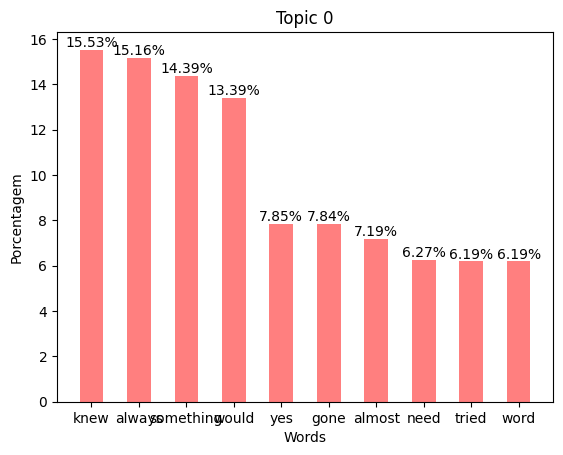

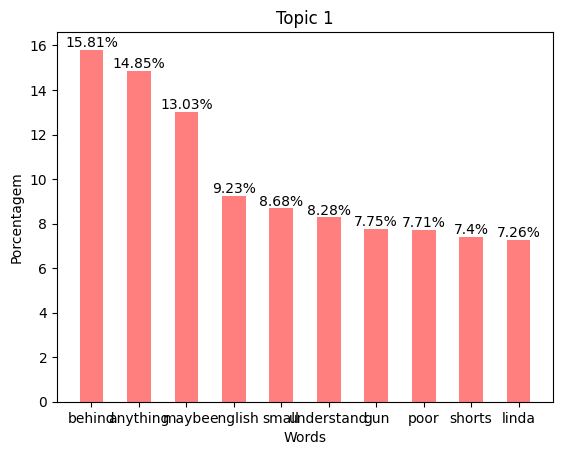

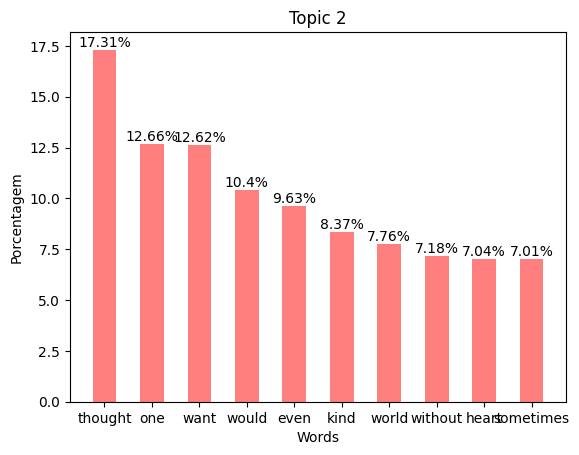

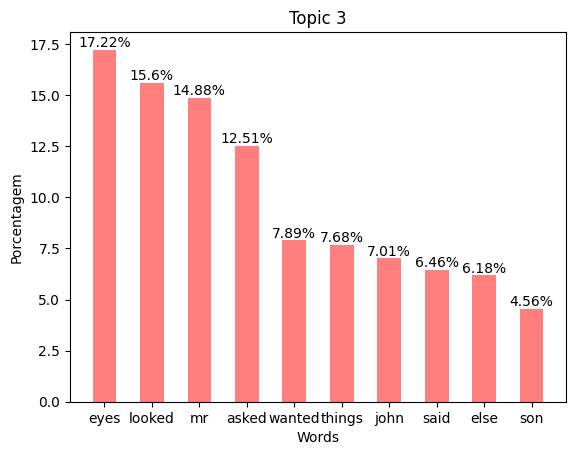

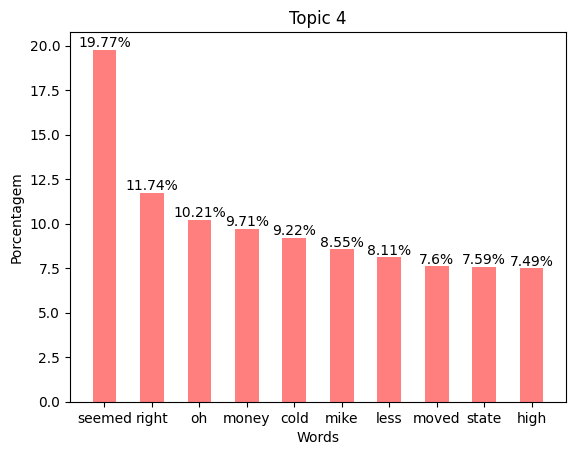

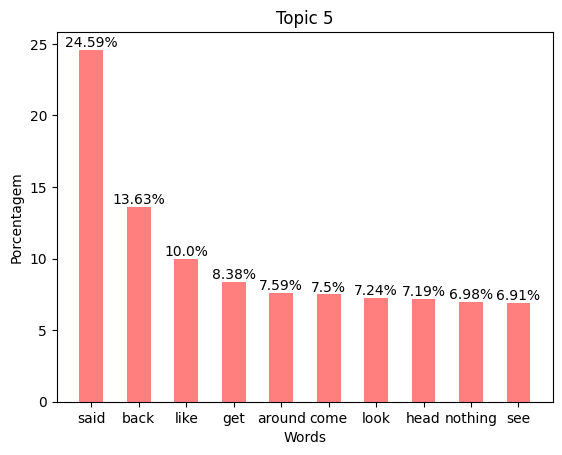

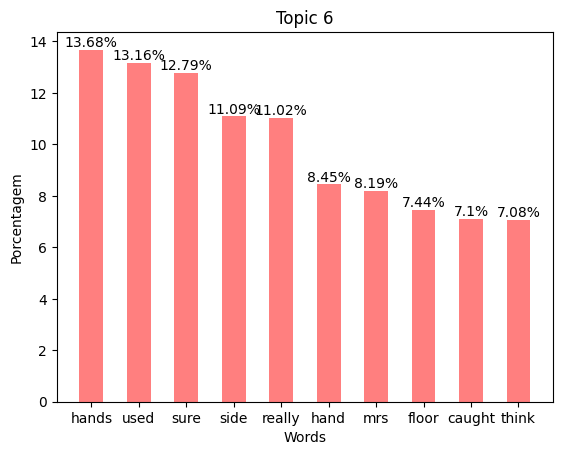

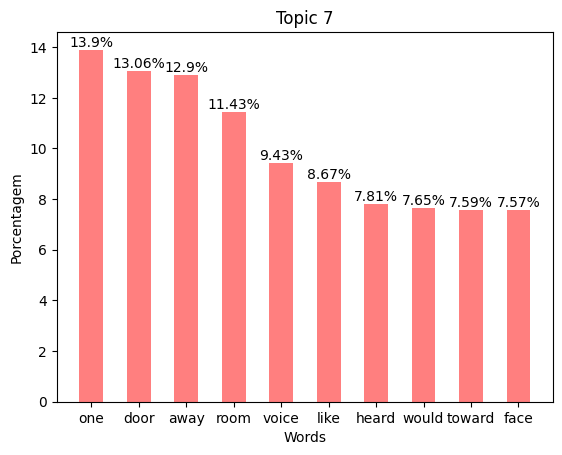

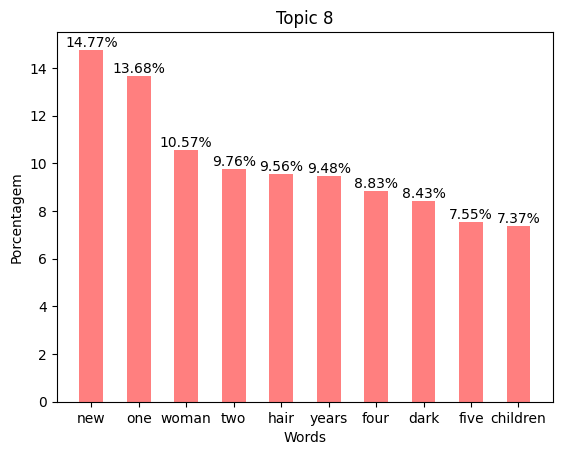

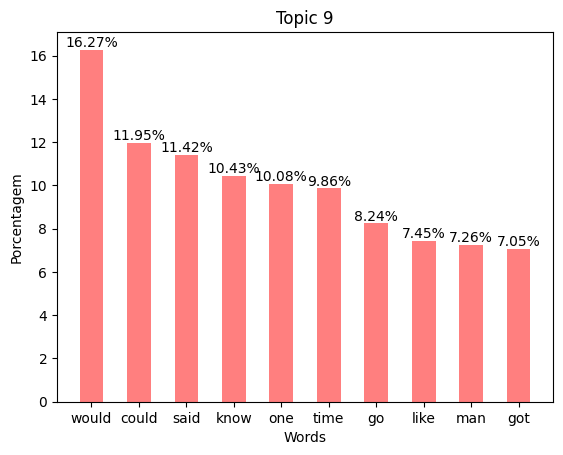

In [6]:
# Primeiro, precisamos instalar algumas bibliotecas necessárias
#!pip install nltk gensim pyLDAvis

# Em seguida, precisamos importar as bibliotecas
import nltk
import gensim
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from imp import reload 

# Vamos começar baixando alguns dados de exemplo do nltk
nltk.download('brown')

# Em seguida, precisamos pré-processar os dados para remover stopwords e outras etapas de pré-processamento
from nltk.corpus import brown
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

stop_words = stopwords.words('english')

def preprocess(text):
  text = ' '.join(text) # junte as palavras em uma string
  text = [word for word in simple_preprocess(text) if word not in stop_words] # remova stopwords
  return text


# Aplique o pré-processamento aos documentos do corpus brown
corpus = [preprocess(doc) for doc in brown.sents()]

# Em seguida, vamos criar um dicionário de palavras a partir do corpus
dictionary = gensim.corpora.Dictionary(corpus)

# Em seguida, vamos criar o corpus em formato bag-of-words
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

# Agora, podemos treinar o modelo LDA
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=5)

# Também podemos plotar os tópicos gerados pelo modelo LDA usando matplotlib
topics = lda_model.show_topics(num_words=10, formatted=False)

for topic in topics:
    words = [word[0] for word in topic[1]]
    weights = [word[1] for word in topic[1]]
    total_weight = sum(weights)
    percentages = [round(weight/total_weight*100,2) for weight in weights]
    plt.figure()
    plt.title('Topic {}'.format(topic[0]))
    plt.bar(words, percentages, width=0.5, color='r', alpha=0.5, align='center', edgecolor='none')
    plt.xticks(words, words)
    for i, v in enumerate(percentages):
        plt.text(i, v, str(v)+'%', ha='center', va='bottom')
    plt.xlabel('Words')
    plt.ylabel('Porcentagem')
    plt.show()


O código é usado para visualizar os tópicos gerados pelo modelo LDA usando o pacote pyLDAvis. Primeiro, o pacote pyLDAvis é importado e habilitado para uso em notebooks. Em seguida, o objeto vis é preparado usando o modelo LDA, a matriz de corpus de arco e o dicionário passados como argumento. Por fim, a visualização é exibida.

In [7]:
# Vamos visualizar os tópicos gerados pelo modelo LDA
from imp import reload 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

vis

/home/codespace/.python/current/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/codespace/.python/current/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/codespace/.python/current/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/codespace/.python/current/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for r

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.215921  0.042110       1        1  13.156729
7      0.129470  0.038055       2        1  11.820796
5      0.251707 -0.064491       3        1  10.815016
2      0.055386 -0.035919       4        1  10.763472
0     -0.068374  0.099028       5        1  10.563309
8     -0.075621  0.112081       6        1  10.037752
4     -0.159532 -0.021538       7        1   8.962637
3     -0.125282  0.090078       8        1   8.754728
1     -0.115789  0.087078       9        1   8.737422
6     -0.107887 -0.346482      10        1   6.388140, topic_info=        Term         Freq        Total Category  logprob  loglift
14      said  3700.000000  3700.000000  Default  30.0000  30.0000
3134    eyes  1152.000000  1152.000000  Default  29.0000  29.0000
1969  looked  1044.000000  1044.000000  Default  28.0000  28.0000
1703      mr   996.000000   996.000000  Default  27.0000  27.0000
309     back  1576.000000  1576.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2308   think   265.442084   746.872833  Topic10  -4.8505   1.7162
1815   table   176.899224   293.213410  Topic10  -5.2563   2.2454
845   better   175.402735   468.198509  Topic10  -5.2648   1.7689
147      one   217.322408  3790.001347  Topic10  -5.0505  -0.1080
945    right   177.490923   988.812841  Topic10  -5.2529   1.0331

[511 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7260      3  0.997321         af
441       2  0.994785  afternoon
733       5  0.688377     almost
733       6  0.308804     almost
110       1  0.001368       also
...     ...       ...        ...
1249      5  0.996764        yes
505       2  0.572582        yet
505       5  0.246557        yet
505       7  0.177276        yet
1162      6  0.995052       york

[809 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 6, 3, 1, 9, 5, 4, 2, 7])

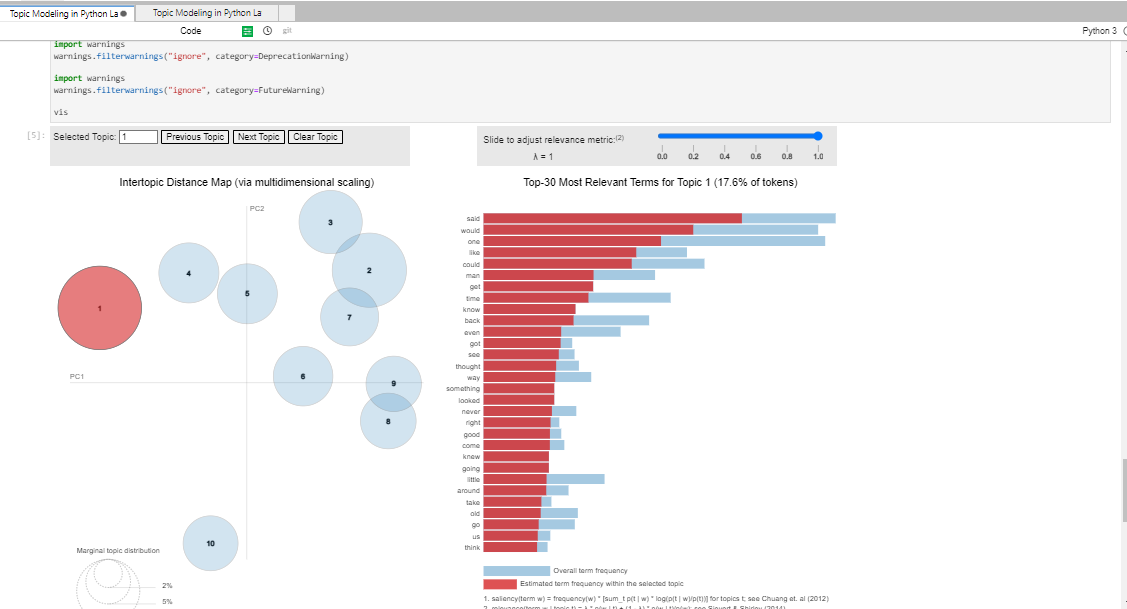

Este código cria nuvens de palavras para cada tópico identificado pelo modelo LDA. Primeiro, obtemos os tópicos do modelo LDA. Em seguida, criamos uma nuvem de palavras para cada tópico com as 10 palavras mais frequentes usando a biblioteca WordCloud. Por último, exibimos as nuvens de palavras para cada tópico.

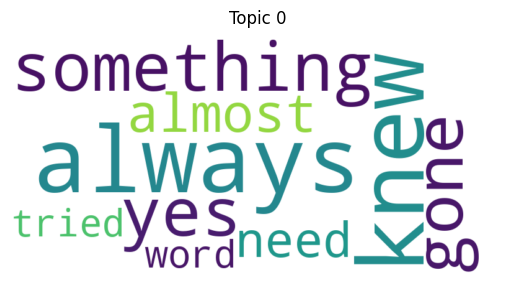

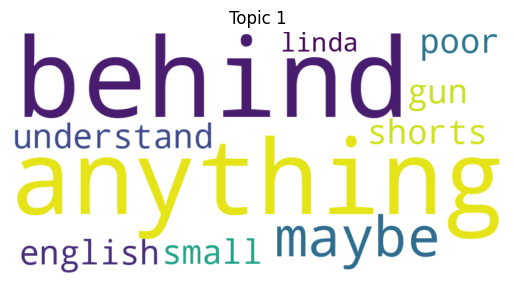

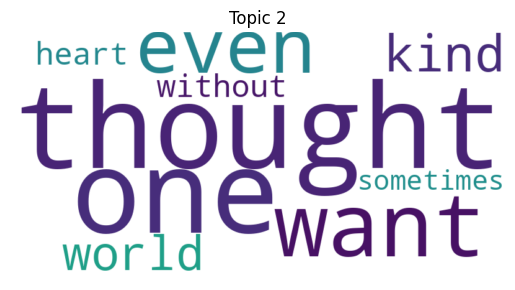

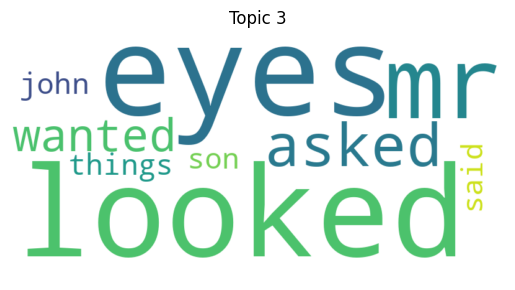

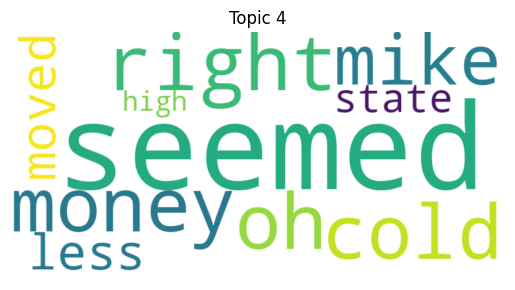

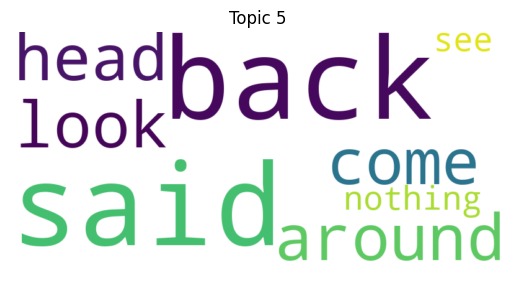

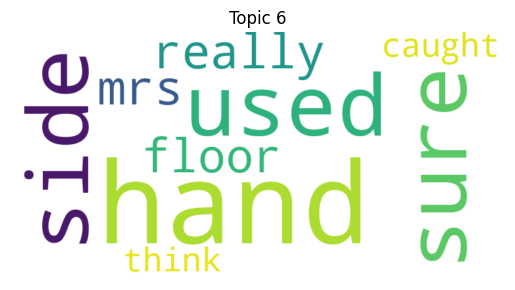

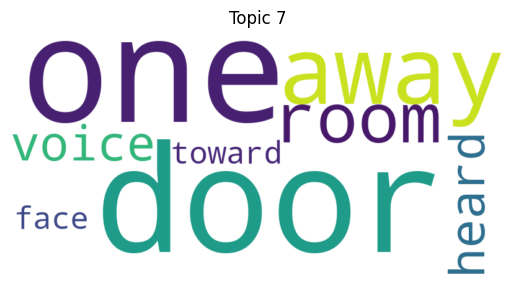

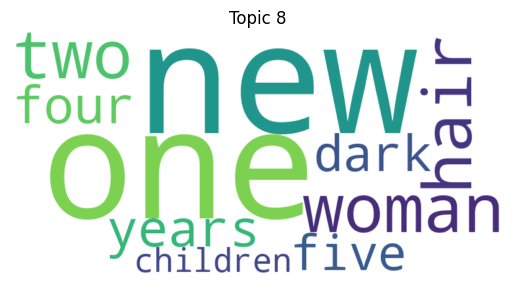

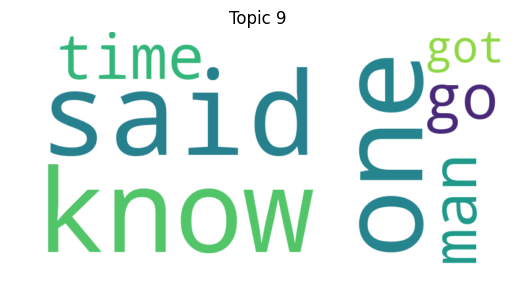

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtenha os tópicos do modelo LDA
topics = lda_model.show_topics(num_words=10, formatted=False)

# Para cada tópico, crie uma nuvem de palavras com as 10 palavras mais frequentes
for topic in topics:
    words = [word[0] for word in topic[1]]
    wordcloud = WordCloud(background_color="white", width=800, height=400).generate(" ".join(words))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic %d" % topic[0])
    plt.show()


Este código gera gráficos de pizza para cada tópico. Ele usa a biblioteca matplotlib.pyplot para isso. O código itera sobre todos os tópicos e, para cada um, pega as palavras e seus pesos. Os pesos são usados ​​para criar a porcentagem de fatia de cada palavra. Finalmente, a função plt.pie é usada para criar o gráfico de pizza para cada tópico.

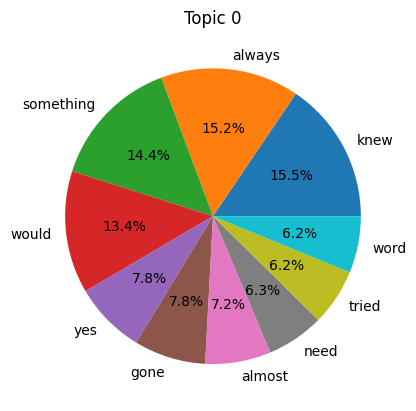

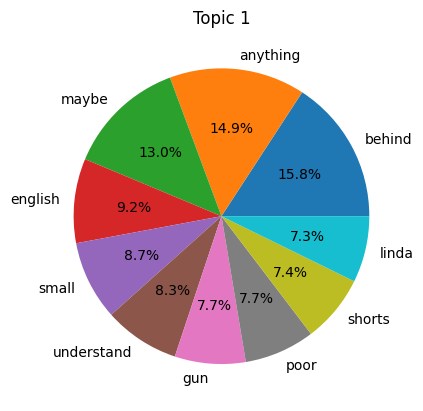

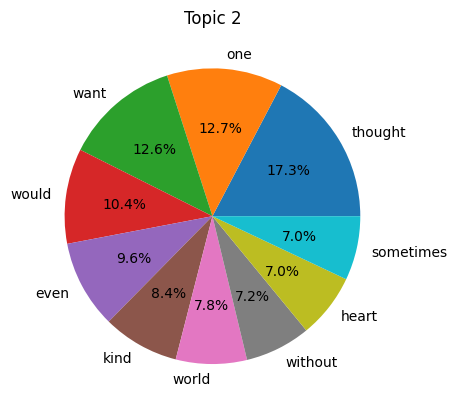

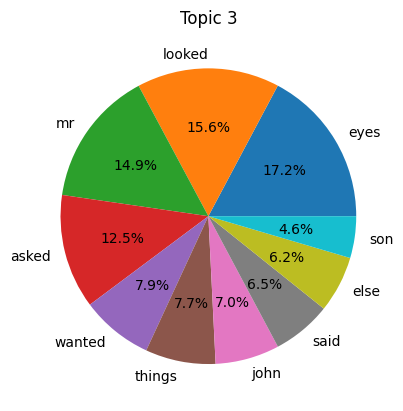

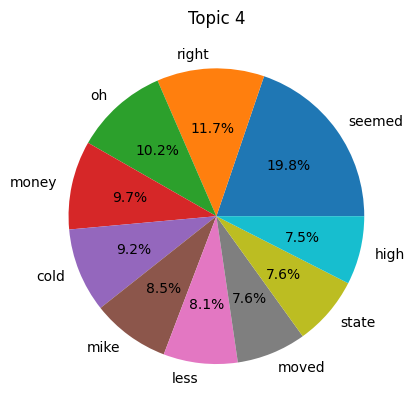

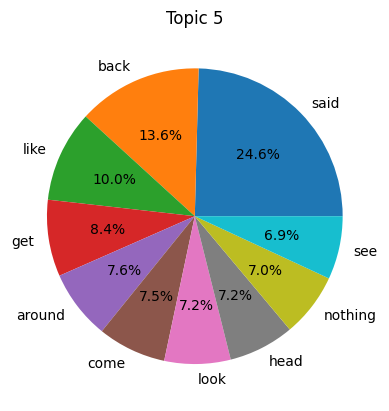

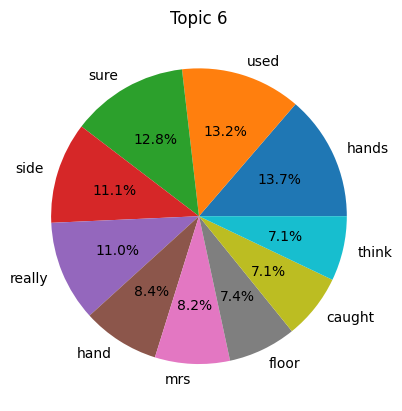

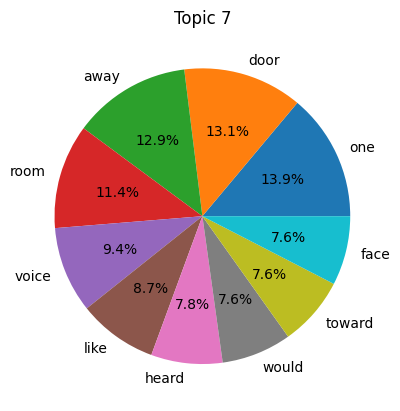

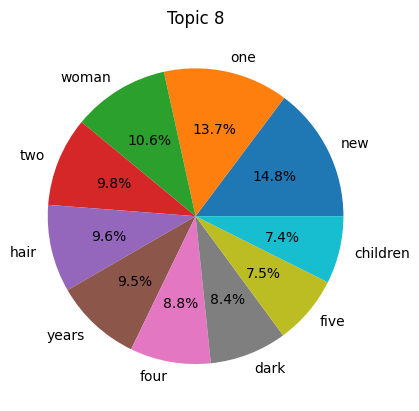

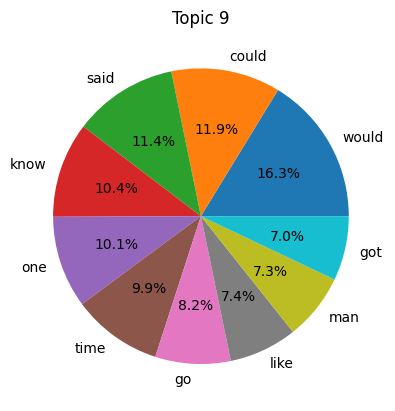

In [9]:
import matplotlib.pyplot as plt

for topic in topics:
    words = [word[0] for word in topic[1]]
    weights = [word[1] for word in topic[1]]
    plt.figure()
    plt.title('Topic {}'.format(topic[0]))
    plt.pie(weights, labels=words, autopct='%1.1f%%')


Este código permite visualizar os tópicos de uma coleção de documentos. Ele constrói um gráfico de dispersão para cada tópico, com as palavras do tópico nos eixos x e os pesos das palavras nos eixos y. Para cada palavra, também é exibida uma etiqueta contendo a palavra. O código itera sobre cada tópico na coleção de documentos e cria um gráfico de dispersão para cada tópico.

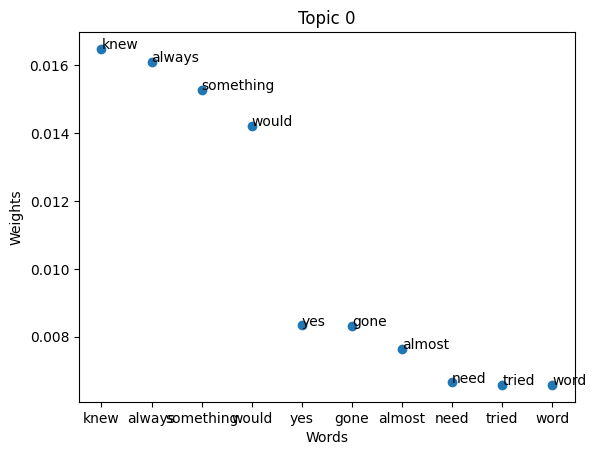

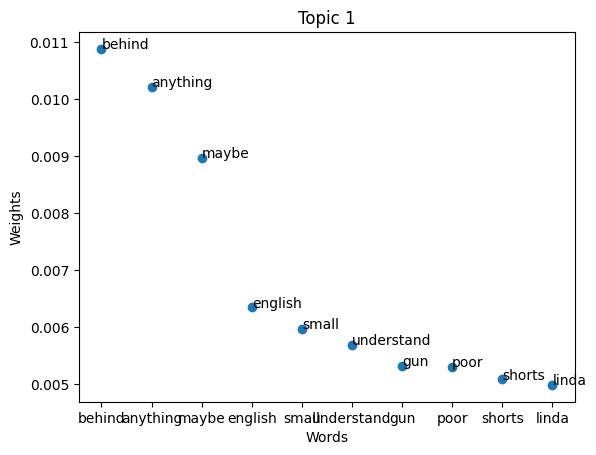

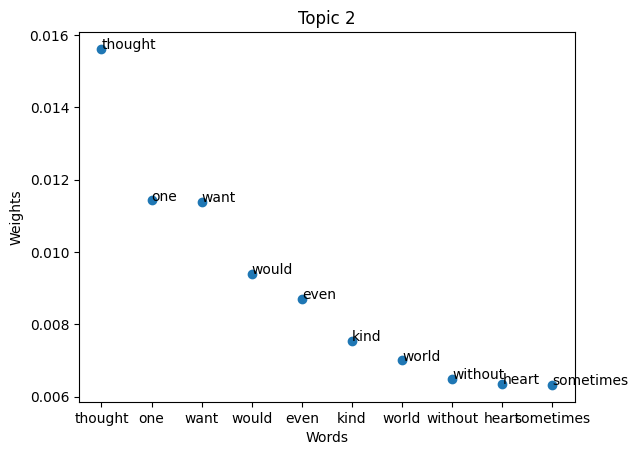

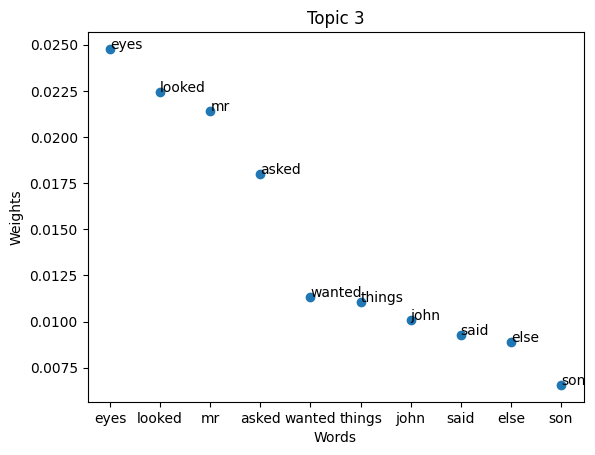

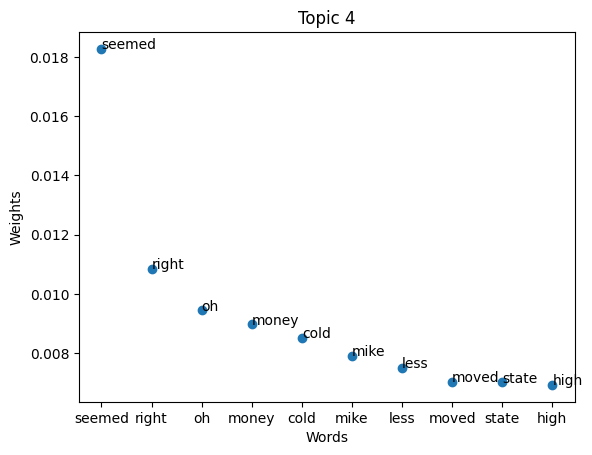

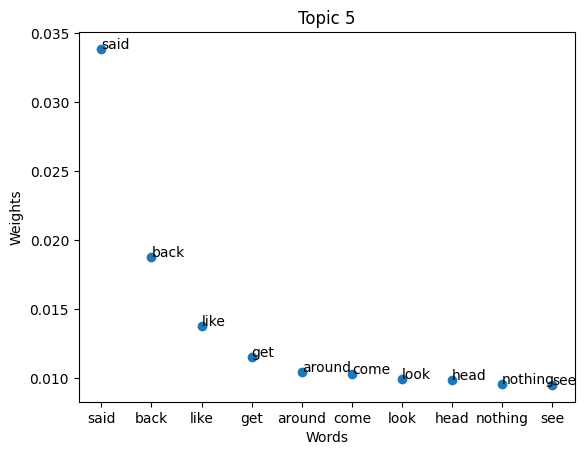

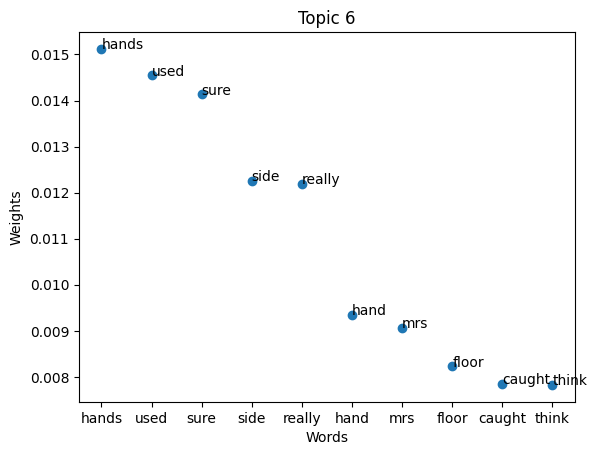

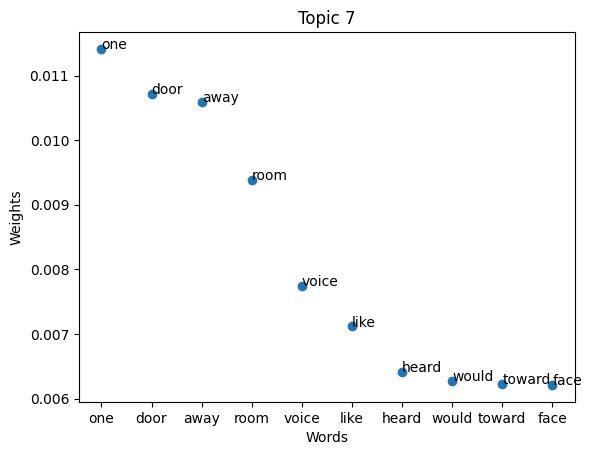

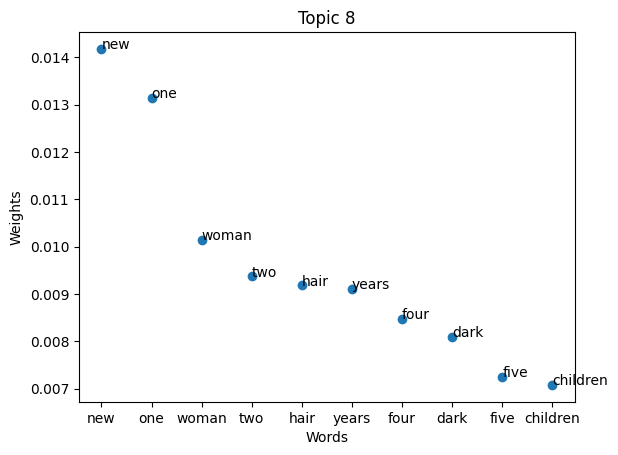

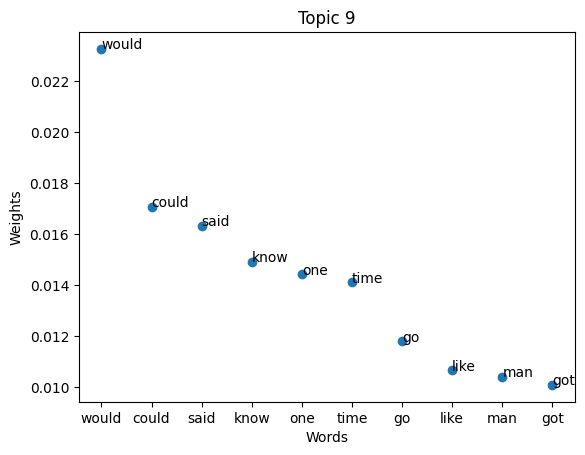

In [10]:
import matplotlib.pyplot as plt

for topic in topics:
    words = [word[0] for word in topic[1]]
    weights = [word[1] for word in topic[1]]
    plt.figure()
    plt.title('Topic {}'.format(topic[0]))
    plt.scatter(words, weights)
    for i, txt in enumerate(words):
        plt.annotate(txt, (words[i], weights[i]))
    plt.xlabel('Words')
    plt.ylabel('Weights')
    plt.show()